In [1]:
#Import all the dependencies
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import sys
import csv
csv.field_size_limit(sys.maxsize)

with open('data1997.csv', 'r') as f:
    reader = csv.reader(f)
    your_list = list(reader)
print(len(your_list))
tagged_data = [TaggedDocument(words=word_tokenize(str(d)), tags=[str(i)]) for i, d in enumerate(your_list)]
max_epochs = 100
vec_size = 128
alpha = 0.025

5199


In [2]:
import gensim.models as g
model="d2v(2).model"
m = g.Doc2Vec.load(model)

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
scaler = MinMaxScaler()
X = []
for i in range(5199):
    X.append(m.docvecs[i])
X_scaled = scaler.fit_transform(X)

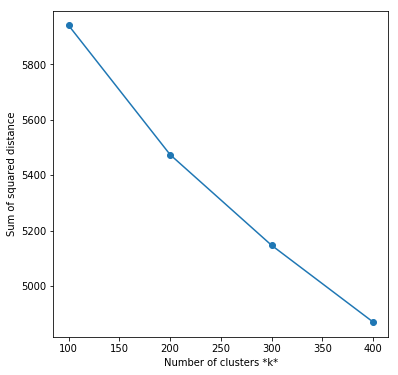

In [8]:
sse = []
list_k = list(range(100, 500, 100))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_scaled)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');